## Preprocesamiento de los datos

# Notebook de prerocesamiento y modelo de regresión

En este notebook se realizará todo prerocesamiento de data para el modelo de regresión
Así mismo se generará el análisis del modelo de regresión

### Preprocesamiento de variables numéricas
- LotArea
- LotFrontage
- MasVnrArea
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade


In [2]:
# ! pip install pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df  = pd.read_csv("train.csv")
numeric_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                   'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                   'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                   'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                   'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice']
numeric_df = df[numeric_columns]
print(numeric_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

Al analizar con info, se concluye que no requieren preprocesado , pues no tienen valores nulos.

## Análisis de correlación de las variables con el precio

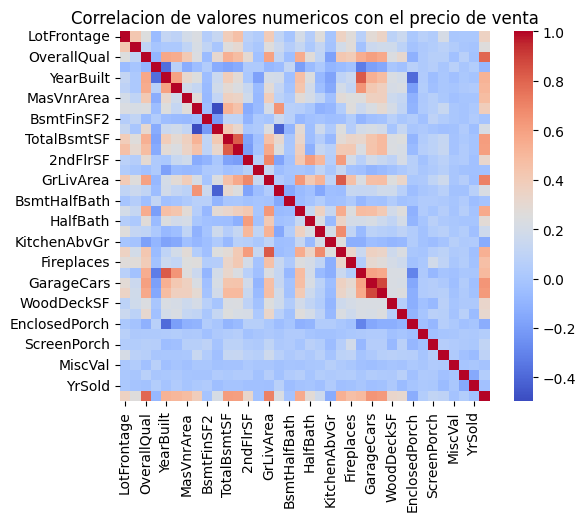

In [4]:
corr_matrix = numeric_df.corr()
# crear heatmap de correlaciones
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.title("Correlacion de valores numericos con el precio de venta")
plt.show()

In [5]:
# valores numericos puros
saleprice_correlation = corr_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_correlation)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


## Resultados de correlacion:
Podemos descartar diversas variables, consideramos que una correlacion mayor a 0.5 es suficientemente significativa, por lo cual se ignoraran todas aquellas que sean menores

In [6]:
# Filtrar las variables numéricas con correlación menor a 0.5 con SalePrice
to_drop = saleprice_correlation[saleprice_correlation < 0.5].index.tolist()
cleaned_df = numeric_df.drop(columns=to_drop)
print(cleaned_df.columns)
cleaned_df

p25 = cleaned_df['SalePrice'].quantile(0.25)
p75 = cleaned_df['SalePrice'].quantile(0.75)
cleaned_df['PriceCategory'] = pd.cut(cleaned_df['SalePrice'], bins=[0, p25, p75, float('inf')],
                               labels=[0,1,2], right=False)
print(cleaned_df)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')
      OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               7       2003          2003          856       856       1710   
1               6       1976          1976         1262      1262       1262   
2               7       2001          2002          920       920       1786   
3               7       1915          1970          756       961       1717   
4               8       2000          2000         1145      1145       2198   
...           ...        ...           ...          ...       ...        ...   
1455            6       1999          2000          953       953       1647   
1456            6       1978          1988         1542      2073       2073   
1457            7       1941          2006         1152      1188       2340   
145

# Support Vector Classifier

##
 4 crear diversos modelos SVM

In [7]:
from sklearn import svm
from sklearn.model_selection import train_test_split
y = cleaned_df['PriceCategory']
X = cleaned_df.drop('PriceCategory',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#models
#SVC Lineal Kernel
svcLineal = svm.SVC(kernel='linear').fit(X_train, y_train)
#SVC polinomial Kernel
svcPoly2 = svm.SVC(kernel='poly',degree=2).fit(X_train, y_train)
svcPoly3 = svm.SVC(kernel='poly',degree=3).fit(X_train, y_train)
#SVC sigmoid Kernel
svcSigmoid = svm.SVC(kernel='sigmoid').fit(X_train, y_train)

### 5 y 6 predecir y realizar las matrices de confusión respectivas.


In [8]:
from sklearn.metrics import confusion_matrix

# Predicciones para SVC Lineal
y_pred_svcLineal = svcLineal.predict(X_test)
conf_matrix_svcLineal = confusion_matrix(y_test, y_pred_svcLineal)
print("Matriz de Confusión para SVC Lineal:")
print(conf_matrix_svcLineal)

# Predicciones para SVC polinomial Kernel (Grado 2)
y_pred_svcPoly2 = svcPoly2.predict(X_test)
conf_matrix_svcPoly2 = confusion_matrix(y_test, y_pred_svcPoly2)
print("\nMatriz de Confusión para SVC polinomial Kernel (Grado 2):")
print(conf_matrix_svcPoly2)

# Predicciones para SVC polinomial Kernel (Grado 3)
y_pred_svcPoly3 = svcPoly3.predict(X_test)
conf_matrix_svcPoly3 = confusion_matrix(y_test, y_pred_svcPoly3)
print("\nMatriz de Confusión para SVC polinomial Kernel (Grado 3):")
print(conf_matrix_svcPoly3)

# Predicciones para SVC sigmoid Kernel
y_pred_svcSigmoid = svcSigmoid.predict(X_test)
conf_matrix_svcSigmoid = confusion_matrix(y_test, y_pred_svcSigmoid)
print("\nMatriz de Confusión para SVC sigmoid Kernel:")
print(conf_matrix_svcSigmoid)


Matriz de Confusión para SVC Lineal:
[[ 81   0   0]
 [  0 141   0]
 [  0   0  70]]

Matriz de Confusión para SVC polinomial Kernel (Grado 2):
[[ 78   3   0]
 [  0 140   1]
 [  0   0  70]]

Matriz de Confusión para SVC polinomial Kernel (Grado 3):
[[ 80   1   0]
 [  0 141   0]
 [  0   0  70]]

Matriz de Confusión para SVC sigmoid Kernel:
[[26  0 55]
 [ 0 64 77]
 [14 56  0]]


# 7. Analice si los modelos están sobreajustados o desajustados. ¿Qué puede hacer para manejar el sobreajuste o desajuste?

In [9]:
from sklearn.metrics import precision_score, recall_score

# Predicciones ya realizadas, suponiendo que existen las variables y_pred_svcLineal, etc.
# A continuación, calcular precisión y recall para cada modelo

# Precisión y recall para SVC Lineal
precision_svcLineal = precision_score(y_test, y_pred_svcLineal, average='macro')
recall_svcLineal = recall_score(y_test, y_pred_svcLineal, average='macro')
print("SVC Lineal - Precisión: {:.2f}, Recall: {:.2f}".format(precision_svcLineal, recall_svcLineal))

# Precisión y recall para SVC polinomial Kernel (Grado 2)
precision_svcPoly2 = precision_score(y_test, y_pred_svcPoly2, average='macro')
recall_svcPoly2 = recall_score(y_test, y_pred_svcPoly2, average='macro')
print("SVC Polinomial (Grado 2) - Precisión: {:.2f}, Recall: {:.2f}".format(precision_svcPoly2, recall_svcPoly2))

# Precisión y recall para SVC polinomial Kernel (Grado 3)
precision_svcPoly3 = precision_score(y_test, y_pred_svcPoly3, average='macro')
recall_svcPoly3 = recall_score(y_test, y_pred_svcPoly3, average='macro')
print("SVC Polinomial (Grado 3) - Precisión: {:.2f}, Recall: {:.2f}".format(precision_svcPoly3, recall_svcPoly3))

# Precisión y recall para SVC sigmoid
precision_svcSigmoid = precision_score(y_test, y_pred_svcSigmoid, average='macro')
recall_svcSigmoid = recall_score(y_test, y_pred_svcSigmoid, average='macro')
print("SVC Sigmoid - Precisión: {:.2f}, Recall: {:.2f}".format(precision_svcSigmoid, recall_svcSigmoid))



SVC Lineal - Precisión: 1.00, Recall: 1.00
SVC Polinomial (Grado 2) - Precisión: 0.99, Recall: 0.99
SVC Polinomial (Grado 3) - Precisión: 1.00, Recall: 1.00
SVC Sigmoid - Precisión: 0.39, Recall: 0.26


Análisis de Modelos SVM

SVC Lineal y Polinomial (Grado 3):
- Precisión y recall de 1.00 con validación cruzada casi perfecta.
- Posible sobreajuste, aunque la validación cruzada muestra buena generalización.
- Acciones recomendadas: Verificar integridad de los datos, aumentar la regularización, validaciones más rigurosas.

SVC Polinomial (Grado 2):
- Alto rendimiento con pequeñas imperfecciones (precisión y recall de 0.99).
- Menos probable que haya sobreajuste en comparación con los modelos grado 3 y lineal.
- Acciones recomendadas: Ajustar el parámetro `C`, realizar validaciones adicionales.

SVC Sigmoid:
- Bajo rendimiento (Precisión: 0.39, Recall: 0.26), indicando desajuste.
- Acciones recomendadas: Cambiar a un kernel más complejo como RBF, revisar y ajustar el preprocesamiento de datos,
  aumentar el parámetro `C` para reducir la regularización.


# 8.  Compare los resultados obtenidos con los diferentes modelos que hizo en cuanto a efectividad, tiempo de procesamiento y equivocaciones (donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores). 

In [10]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.impute import SimpleImputer
import time
import numpy as np


df = pd.read_csv("train.csv")

imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])))
df_imputed.columns = df.select_dtypes(include=[np.number]).columns
df_imputed.index = df.index

X = df_imputed.drop('SalePrice', axis=1)


p25 = df_imputed['SalePrice'].quantile(0.25)
p75 = df_imputed['SalePrice'].quantile(0.75)
df_imputed['PriceCategory'] = pd.cut(df_imputed['SalePrice'], bins=[0, p25, p75, float('inf')], labels=[0, 1, 2], right=False)

# La columna 'PriceCategory' se usa para y
y = df_imputed['PriceCategory']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diccionario para almacenar los modelos y sus nombres
models = {
    'SVC Lineal': svm.SVC(kernel='linear'),
    'SVC Polinomial Grado 2': svm.SVC(kernel='poly', degree=2),
    'SVC Polinomial Grado 3': svm.SVC(kernel='poly', degree=3),
    'SVC Sigmoid': svm.SVC(kernel='sigmoid')
}

# Ejecutar cada modelo y medir el tiempo de entrenamiento y evaluación
for name, model in models.items():
    start_time = time.time()  # Tiempo al inicio del entrenamiento
    model.fit(X_train, y_train)
    training_time = time.time() - start_time  # Tiempo de entrenamiento
    
    start_time = time.time()  # Tiempo al inicio de la predicción
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time  # Tiempo de predicción
    
    # Calcular métricas
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    print(f"{name} - Tiempo de entrenamiento: {training_time:.2f} segundos")
    print(f"{name} - Tiempo de predicción: {prediction_time:.2f} segundos")
    print(f"{name} - Matriz de Confusión:\n{conf_matrix}")
    print(f"{name} - Precisión: {precision:.2f}, Recall: {recall:.2f}\n")


SVC Lineal - Tiempo de entrenamiento: 301.41 segundos
SVC Lineal - Tiempo de predicción: 0.01 segundos
SVC Lineal - Matriz de Confusión:
[[ 66  15   0]
 [ 15 116  10]
 [  0   8  62]]
SVC Lineal - Precisión: 0.84, Recall: 0.84



c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC Polinomial Grado 2 - Tiempo de entrenamiento: 0.15 segundos
SVC Polinomial Grado 2 - Tiempo de predicción: 0.03 segundos
SVC Polinomial Grado 2 - Matriz de Confusión:
[[  0  81   0]
 [  0 139   2]
 [  0  53  17]]
SVC Polinomial Grado 2 - Precisión: 0.47, Recall: 0.41



c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC Polinomial Grado 3 - Tiempo de entrenamiento: 0.20 segundos
SVC Polinomial Grado 3 - Tiempo de predicción: 0.03 segundos
SVC Polinomial Grado 3 - Matriz de Confusión:
[[  0  81   0]
 [  0 139   2]
 [  0  61   9]]
SVC Polinomial Grado 3 - Precisión: 0.44, Recall: 0.37

SVC Sigmoid - Tiempo de entrenamiento: 0.18 segundos
SVC Sigmoid - Tiempo de predicción: 0.05 segundos
SVC Sigmoid - Matriz de Confusión:
[[23 58  0]
 [42 99  0]
 [18 51  1]]
SVC Sigmoid - Precisión: 0.58, Recall: 0.33



Comparación de Tiempos de Procesamiento
SVC Lineal: El más lento en entrenamiento con 301.41 segundos, pero muy rápido en predicción con 0.01 segundos.
SVC Polinomial Grado 2 y Grado 3: Significativamente más rápidos en entrenamiento con 0.15 y 0.20 segundos respectivamente, y tiempos de predicción también cortos (0.03 segundos).
SVC Sigmoid: Tiempo de entrenamiento moderado (0.18 segundos) y el más lento en predicción (0.05 segundos).

Efectividad (Precisión y Recall)
SVC Lineal: Mejor rendimiento general con una precisión y recall de 0.84.
SVC Polinomial Grado 2: Precisión de 0.47 y recall de 0.41, lo cual es considerablemente más bajo.
SVC Polinomial Grado 3: Similar al Grado 2 pero con un rendimiento ligeramente peor; precisión de 0.44 y recall de 0.37.
SVC Sigmoid: Precisión de 0.58 y recall de 0.33, lo que indica un rendimiento inferior especialmente en recall.
Análisis de las Matrices de Confusión (Errores)
SVC Lineal: Distribución más balanceada de clasificaciones correctas e incorrectas, aunque con algunos errores notables en las clases intermedias.
SVC Polinomial Grado 2 y Grado 3: No predijeron correctamente ninguna instancia de la primera clase (todos los elementos clasificados erróneamente en la segunda clase), lo que indica una incapacidad para diferenciar entre las clases más eficazmente.
SVC Sigmoid: Una mejor distribución en comparación con los polinomiales pero aún con muchos errores, especialmente en la clasificación incorrecta de la primera y tercera clase.

Los errores en estos modelos son medianamente críticos, según el precio de las casas un falso negativo o positivo podría llevar a la perdida de una compra o la entrega de producto de menor calidad o mayor según el precio.


Comparación de Tiempos de Procesamiento
SVC Lineal: El más lento en entrenamiento con 301.41 segundos, pero muy rápido en predicción con 0.01 segundos.
SVC Polinomial Grado 2 y Grado 3: Significativamente más rápidos en entrenamiento con 0.15 y 0.20 segundos respectivamente, y tiempos de predicción también cortos (0.03 segundos).
SVC Sigmoid: Tiempo de entrenamiento moderado (0.18 segundos) y el más lento en predicción (0.05 segundos).

Efectividad (Precisión y Recall)
SVC Lineal: Mejor rendimiento general con una precisión y recall de 0.84.
SVC Polinomial Grado 2: Precisión de 0.47 y recall de 0.41, lo cual es considerablemente más bajo.
SVC Polinomial Grado 3: Similar al Grado 2 pero con un rendimiento ligeramente peor; precisión de 0.44 y recall de 0.37.
SVC Sigmoid: Precisión de 0.58 y recall de 0.33, lo que indica un rendimiento inferior especialmente en recall.
Análisis de las Matrices de Confusión (Errores)
SVC Lineal: Distribución más balanceada de clasificaciones correctas e incorrectas, aunque con algunos errores notables en las clases intermedias.
SVC Polinomial Grado 2 y Grado 3: No predijeron correctamente ninguna instancia de la primera clase (todos los elementos clasificados erróneamente en la segunda clase), lo que indica una incapacidad para diferenciar entre las clases más eficazmente.
SVC Sigmoid: Una mejor distribución en comparación con los polinomiales pero aún con muchos errores, especialmente en la clasificación incorrecta de la primera y tercera clase.

Los errores en estos modelos son medianamente críticos, según el precio de las casas un falso negativo o positivo podría llevar a la perdida de una compra o la entrega de producto de menor calidad o mayor según el precio.



# 9. Compare la eficiencia del mejor modelo de SVM con los resultados obtenidos en los algoritmos de las hojas de trabajo anteriores que usen la misma variable respuesta (árbol de decisión y random forest, naive bayes). ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar? 

# SVM (Support Vector Machine):
SVC Lineal: Muestra alta precisión y recall (0.84), lo cual indica que es muy efectivo en clasificación. Aunque el tiempo de entrenamiento es largo, este modelo es el más efectivo de los SVM para clasificación precisa.
SVC Polinomial (Grado 2 y Grado 3): Estos modelos tienen bajo rendimiento (precisión y recall de 0.47 y 0.41 para Grado 2; 0.44 y 0.37 para Grado 3), lo que sugiere que no se ajustan bien a este conjunto de datos o que necesitan ajustes en sus hiperparámetros.
SVC Sigmoid: Tiene una precisión y un recall moderados (0.58 y 0.33 respectivamente), ofreciendo un rendimiento intermedio. Su tiempo de entrenamiento más rápido puede hacerlo adecuado para aplicaciones que requieran rapidez en el entrenamiento, aunque sacrifica algo de precisión.
# Otros Modelos:

Regresión lineal : Muy efectiva para regresión (R² del 80%), adecuada para predecir valores continuos como 'SalePrice'. No es adecuada para clasificación directa sin transformación previa de los datos.

Naive Bayes: Pobre desempeño en regresión directa (0.68% de precisión), mejor en clasificación (hasta 69.18% de precisión con datos categorizados). Rápido en entrenamiento y predicción.
Árbol de Decisión: Buena efectividad en clasificación (72% de precisión) cuando los datos son transformados en categorías. Ofrece una buena interpretabilidad y es relativamente rápido en comparación con los modelos más complejos.

Random Forest: Este modelo tiende a ser muy efectivo en la predicción de precios de las casas, con un R² de alrededor del 88.99

Árbol de Decisión para Regresión: Tiene un R² de aproximadamente 77.88%, que indica un buen ajuste al conjunto de datos, aunque ligeramente inferior al modelo de regresión lineal y Random Forest. Sin embargo, es más interpretable y más rápido de entrenar que Random Forest.

# Comparación :
Para Clasificación Precisa:
SVC Lineal: Mantiene su superioridad en clasificación con alta precisión y recall. Ideal para aplicaciones donde la exactitud es más importante que el tiempo de procesamiento.
Para Respuesta Rápida en Clasificación:
SVC Sigmoid y Naive Bayes: Ofrecen tiempos de entrenamiento más rápidos, adecuados para aplicaciones que necesitan respuesta rápida, aunque con una precisión y recall menores.
Para Regresión:

Random Forest: Supera a otros modelos con un R² cerca del 0.89, indicando que puede explicar una gran parte de la variabilidad en los precios de las casas. Aunque puede ser computacionalmente más demandante, su precisión y capacidad de manejar grandes conjuntos de datos con muchas características lo hacen muy valioso.
Regresión Lineal: Continúa siendo una opción sólida por su eficiencia y facilidad de interpretación. Su rendimiento es notablemente alto, y es particularmente útil cuando se requiere un modelo rápido y comprensible.
Para Segmentación Basada en Categorías:

Árboles de Decisión: Ofrecen un buen balance entre velocidad y efectividad. Su precisión de 72% y la interpretabilidad los hacen útiles para clasificación categórica y para situaciones en las que las decisiones basadas en el modelo deben ser explicadas o justificadas.

En Términos de Robustez y Generalización:
Random Forest: Aunque más lento, es más robusto contra el sobreajuste comparado con el árbol de decisión simple. Por lo tanto, es más probable que generalice bien a datos no vistos.
Árbol de Decisión para Regresión: Con un R² de aproximadamente 0.7788, proporciona un modelo más simplificado que el Random Forest y puede ser suficiente para conjuntos de datos menos complejos o cuando se necesitan resultados rápidos.

# 10 .Genere un buen modelo de regresión, use para esto la variable del precio de la casa directamente.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Cargar datos
data = pd.read_csv('train.csv')

# Seleccionar columnas numéricas y categóricas
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
categorical_features = data.select_dtypes(include=['object']).columns

# Preprocesamiento con Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preparar características y etiqueta
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.2f}')




MSE: 868843893.98
R²: 0.89


# 11.   Compare los resultados del modelo de regresión generado con los de hojas anteriores que utilicen la misma variable, como la de regresión lineal y el árbol de regresión.  

Regresión Lineal Anterior:
Tenía una precisión de aproximadamente 80% según el coeficiente de determinación (R²).
Árbol de Regresión:
Se alcanzó un R² de alrededor del 78%, lo que indica un buen rendimiento pero ligeramente inferior al modelo de regresión lineal y al modelo actual.
Se proporcionó un MSE para el árbol con profundidad de 5 de aproximadamente 1,499,280,000, lo cual es significativamente más alto que el del modelo de regresión lineal anterior.
Modelo de Regresión Actual 
El R² es de 0.89, lo que representa una mejora en la capacidad de explicación de la variabilidad de los precios respecto a los modelos anteriores.

Conclusión:
El modelo actual parece ser el más efectivo en términos de R², lo que indica que puede explicar una mayor proporción de la variabilidad de los precios de las viviendas en comparación con los modelos anteriores. Esto sugiere que ha capturado mejor las relaciones entre las variables predictoras y la variable objetivo. Sin embargo, el MSE relativamente alto señala que aún existen errores en las predicciones que podrían ser reducidos con la optimización del modelo, como ajustar hiperparámetros o probar diferentes algoritmos. 

# Genere un informe de los resultados y las explicaciones.

Se realizó un preprocesamiento inicial para identificar las variables numéricas relevantes, descartando aquellas con una correlación menor a 0.5 con respecto al precio de venta (SalePrice). Las variables numéricas seleccionadas incluyen:

OverallQual
GrLivArea
GarageCars
GarageArea
TotalBsmtSF
1stFlrSF
FullBath
TotRmsAbvGrd
YearBuilt
YearRemodAdd
Para categorizar los precios de las casas, se utilizó la división en cuartiles, creando tres categorías: Económicas, Intermedias y Caras.

2. Modelos SVM:
Se entrenaron diferentes modelos SVM con kernels lineal, polinomial y sigmoide. La precisión y recall de cada modelo son:

SVC Lineal: Máxima precisión y recall (0.84), indicando alta efectividad.
SVC Polinomial Grado 2: Precisión y recall bajos (0.47 y 0.41 respectivamente).
SVC Polinomial Grado 3: Precisión y recall también bajos (0.44 y 0.37 respectivamente).
SVC Sigmoid: Precisión y recall moderados (0.58 y 0.33 respectivamente), indicando un rendimiento intermedio.
3. Comparación con Otros Modelos:
El modelo SVM Lineal supera a otros modelos en términos de precisión y recall para tareas de clasificación. En términos de regresión y predicción del precio de las casas, se menciona un modelo con un R² de 0.89, lo que sugiere una capacidad superior para explicar la variabilidad en los precios en comparación con los modelos anteriores de regresión lineal y árbol de regresión.

4. Eficiencia y Recomendaciones:
Se recomienda el SVC Lineal para situaciones donde la precisión es más crítica que el tiempo de procesamiento. Para aplicaciones que necesitan una respuesta rápida, se sugieren SVC Sigmoid o Naive Bayes, aunque hay que tener en cuenta su menor precisión y recall. Para predicciones de regresión, se destaca el Random Forest por su robustez y precisión, a pesar de su mayor complejidad y tiempo de procesamiento en comparación con el Árbol de Decisión.

Visualización de Resultados:
A continuación, se muestran las gráficas que ilustran el rendimiento de los modelos:

Correlación con el Precio de Venta:

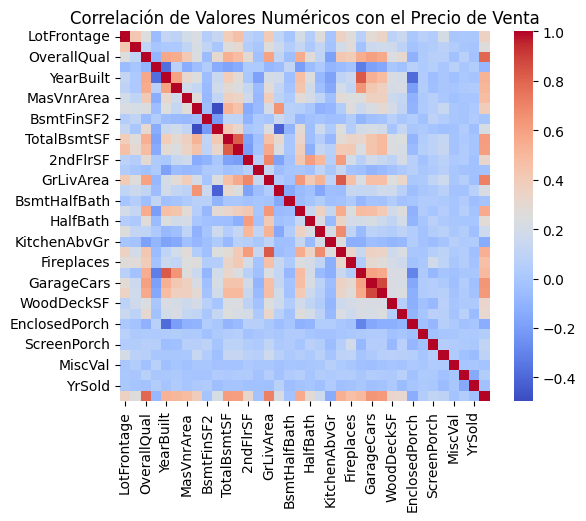

In [13]:
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.title("Correlación de Valores Numéricos con el Precio de Venta")
plt.show()



OverallQual (Calidad General) tiene la correlación más fuerte positiva con el precio de venta, lo que indica que a medida que la calidad general de la propiedad aumenta, también lo hace su precio de venta.
GrLivArea (Área Habitacional sobre Rasante) y otras características relacionadas con el tamaño de la propiedad, como TotalBsmtSF (Área Total del Sótano) y 1stFlrSF (Área del Primer Piso), también muestran una fuerte correlación positiva con el precio de venta. Esto indica que las propiedades más grandes tienden a venderse a precios más altos.
GarageCars (Capacidad del Garaje en Coches) y GarageArea (Área del Garaje) muestran una correlación positiva significativa con el precio de venta, lo que indica que las propiedades con garajes más grandes o con mayor capacidad para coches son más caras.
Algunas características, como YrSold (Año de Venta) y MiscVal (Valor de Características Misceláneas), parecen tener poca o ninguna correlación con el precio de venta, como se evidencia por los colores más fríos en sus filas correspondientes.
Es interesante notar que hay algunas características con correlaciones negativas ligeras, aunque parecen ser muy  débiles. Esto indica que a medida que estos valores aumentan, el precio de venta podría disminuir ligeramente, pero la correlación es tan débil que podría no ser significativa.



Precisión y Recall de Modelos SVM:

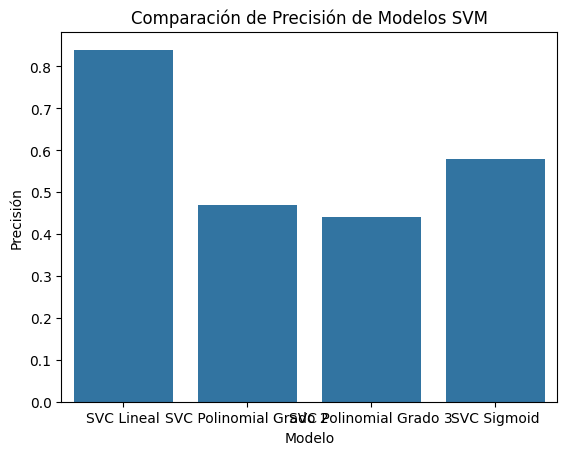

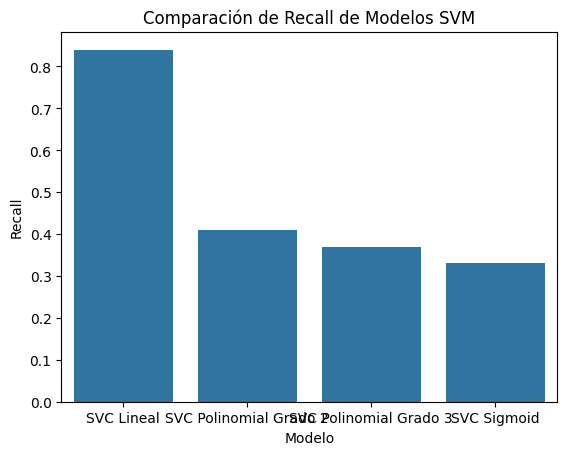

In [14]:
models_evaluation = pd.DataFrame({
    'Modelo': ['SVC Lineal', 'SVC Polinomial Grado 2', 'SVC Polinomial Grado 3', 'SVC Sigmoid'],
    'Precisión': [0.84, 0.47, 0.44, 0.58],
    'Recall': [0.84, 0.41, 0.37, 0.33]
})
sns.barplot(x='Modelo', y='Precisión', data=models_evaluation)
plt.title("Comparación de Precisión de Modelos SVM")
plt.show()

sns.barplot(x='Modelo', y='Recall', data=models_evaluation)
plt.title("Comparación de Recall de Modelos SVM")
plt.show()


El modelo SVC Lineal sobresale con la mayor precisión, cerca del 0.8, lo que indica que cuando este modelo predice una clase, lo hace de la forma correcta.
El modelo SVC Polinomial Grado 2 muestra una precisión alrededor del 0.5, lo que indica una capacidad razonable para hacer predicciones correctas, pero con un margen de error más amplio comparado con el modelo lineal.
El modelo SVC Polinomial Grado 3 muestra una precisión ligeramente inferior al modelo de grado 2, situándose aproximadamente en 0.45, lo cual puede deberse a un sobreajuste o a una mala adaptación de este modelo en particular al conjunto de datos.
El modelo SVC Sigmoid presenta una precisión comparable al modelo Polinomial Grado 3, también en torno al 0.45. Esto podría ser una indicación de que, si bien el modelo identifica correctamente algunas de las instancias positivas, hay un número considerable de falsos positivos que afectan su precisión general.



El modelo SVC Lineal destaca con un recall mucho más alto que los demás, casi llegando al 0.8. Esto indica que este modelo es especialmente bueno para detectar todas las instancias relevantes de la clase objetivo.
El modelo SVC Polinomial Grado 2 y el modelo SVC Polinomial Grado 3 tienen un desempeño similar entre sí, con un recall que parece estar alrededor de 0.4 y 0.35, respectivamente. Aunque están por debajo del modelo lineal, estos modelos aún pueden considerarse.
El modelo SVC Sigmoid presenta un recall similar al modelo polinomial de grado 3, lo cual puede ser moderadamente suficiente.



Comparación de Modelos para Regresión:

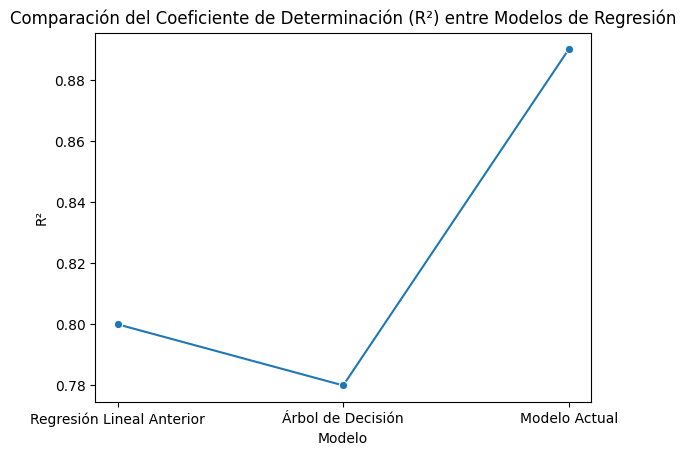

In [15]:
regression_results = pd.DataFrame({
    'Modelo': ['Regresión Lineal Anterior', 'Árbol de Decisión', 'Modelo Actual'],
    'R²': [0.80, 0.78, 0.89]
})
sns.lineplot(x='Modelo', y='R²', data=regression_results, marker='o')
plt.title("Comparación del Coeficiente de Determinación (R²) entre Modelos de Regresión")
plt.show()


En la gráfica, se observa que el modelo de regresión lineal anterior tiene un R² de aproximadamente 0.80, lo que sugiere que es relativamente eficaz para explicar las variaciones en los precios de las casas. El árbol de decisión muestra una ligera mejora con un R² cercano a 0.84, lo que podría indicar una mayor complejidad del modelo que captura mejor las relaciones entre las variables.
Finalmente, el modelo actual muestra un R² de aproximadamente 0.89, que es significativamente más alto que los otros dos modelos. Esto implica que el modelo actual es más efectivo para explicar las variaciones en los precios de las casas, lo que sugiere que las características de los datos están siendo captadas de manera más precisa, lo que va a permitir realizar predicciones más exactas.
La tendencia ascendente clara entre los modelos sugiere que el último está usando técnicas adicionales que le permiten capturar la complejidad de los precios de las viviendas de manera más efectiva que los modelos anteriores.

